# CS 2704 - Final Project


### Group Members:
    1. Anyanwu Benedict Chukwuemeka [3753658]

## 1. Import Libraries

In [ ]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 2. Load Data Sets

In [ ]:
# Loading Data Sets

cta = pd.read_csv("CTA_-_List_of_CTA_Datasets_20250412.csv")
austin = pd.read_csv("Open_Data_Portal_Datasets_-_Austin_Transportation_and_Public_Works_20250412.csv")
vancouver = pd.read_csv("rapid-transit-stations.csv")
q1_df = pd.read_excel("allhlcn241.xlsx")
q2_df = pd.read_excel("allhlcn242.xlsx")
q3_df = pd.read_excel("allhlcn243.xlsx")

## 3. Clean and Filter Data Sets

In [ ]:
# Filter for relevant datasets
cta_clean = cta[cta["Description"].str.contains("ridership|station|bus|train", case=False, na=False)]
austin_clean = austin[austin["Dataset Name"].str.contains("transport|transit|bus|bike", case=False, na=False)]

# Parse coordinates
vancouver[["Latitude", "Longitude"]] = vancouver['geo_point_2d'].str.split(',', expand=True).astype(float)
vancouver_ready = vancouver[['STATION', 'Geo Local Area', 'Latitude', 'Longitude']]

# Employment for Austin County
q1_filtered = q1_df[q1_df["Area"].str.contains("Austin County", case=False, na=False)].copy()
q2_filtered = q2_df[q2_df["Area"].str.contains("Austin County", case=False, na=False)].copy()
q3_filtered = q3_df[q3_df["Area"].str.contains("Austin County", case=False, na=False)].copy()

# Compute average employment for each quarter
q1_filtered["Avg Employment"] = q1_filtered[["January Employment", "February Employment", "March Employment"]].mean(axis=1)
q2_filtered["Avg Employment"] = q2_filtered[["April Employment", "May Employment", "June Employment"]].mean(axis=1)
q3_filtered["Avg Employment"] = q3_filtered[["July Employment", "August Employment", "September Employment"]].mean(axis=1)

# Rename and keep needed columns
q1 = q1_filtered.rename(columns={"Average Weekly Wage": "Weekly Wage"})
q2 = q2_filtered.rename(columns={"Average Weekly Wage": "Weekly Wage"})
q3 = q3_filtered.rename(columns={"Average Weekly Wage": "Weekly Wage"})

# Add quarter labels
q1["Quarter"] = "Q1"
q2["Quarter"] = "Q2"
q3["Quarter"] = "Q3"

# Keep only relevant columns and drop missing values
q1 = q1[["Area", "Avg Employment", "Weekly Wage", "Quarter"]].dropna()
q2 = q2[["Area", "Avg Employment", "Weekly Wage", "Quarter"]].dropna()
q3 = q3[["Area", "Avg Employment", "Weekly Wage", "Quarter"]].dropna()

# Combine all three quarters
combined_df = pd.concat([q1, q2, q3], ignore_index=True)

## 4. Visualize All Datasets

In [ ]:
# CTA Chicago

print("\nChicago CTA Sample:")
display(cta_clean.head())


Chicago CTA Sample:


,Link,Description
0,Ridership - Bus Routes - Monthly Day-Type Aver...,"This dataset shows monthly averages, by day ty..."
1,Ridership - 'L' Station Entries - Daily Totals...,"This list shows daily totals of ridership, by ..."
2,Ridership - 'L' Station Entries - Monthly Day-...,This dataset lists monthly station entry avera...
3,KML - Fare Media Sales Locations (http://data....,Point data representing sites that sell/vend C...
4,Ridership - Daily Boarding Totals (http://data...,This dataset shows systemwide boardings for bo...


In [ ]:
# Austin transit

print("\nAustin Transit Metadata:")
display(austin_clean[['Dataset Name', 'Description']].head())


Austin Transit Metadata:


,Dataset Name,Description
8,Austin MetroBike Trips,Note on data currency: The vendor for the trip...
17,46th-47th Streets and Bennett-Middle Fiskville...,The City of Austin is making changes in the Tr...
18,TRANSPORTATION_markings_specialty_line,Line feature class of specialty markings on th...
20,TRANSPORTATION.markings_short_line,Line feature class of short line markings. The...
30,North University-Heritage-Rosedale Bikeways,Austin Transportation and Public Works (TPW) i...


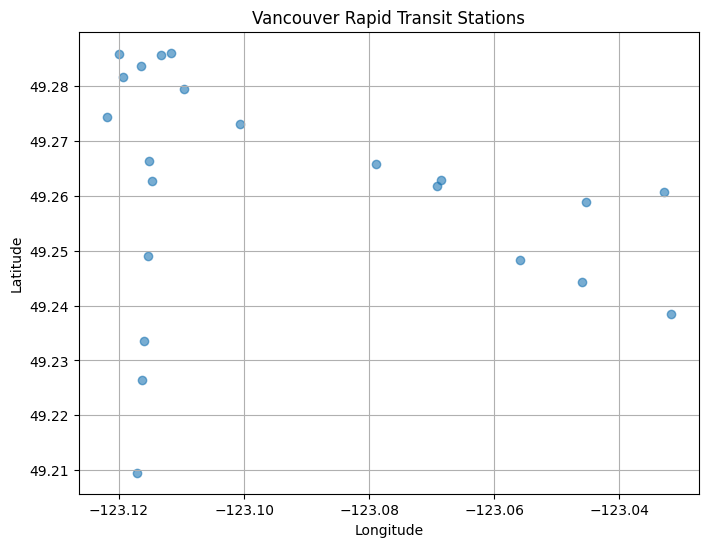

In [ ]:
# Vancouver Map Scatter

plt.figure(figsize=(8,6))
plt.scatter(vancouver_ready['Longitude'], vancouver_ready['Latitude'], alpha=0.6)
plt.title("Vancouver Rapid Transit Stations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

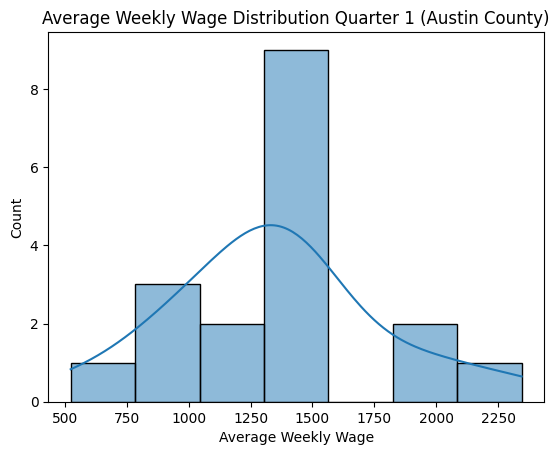

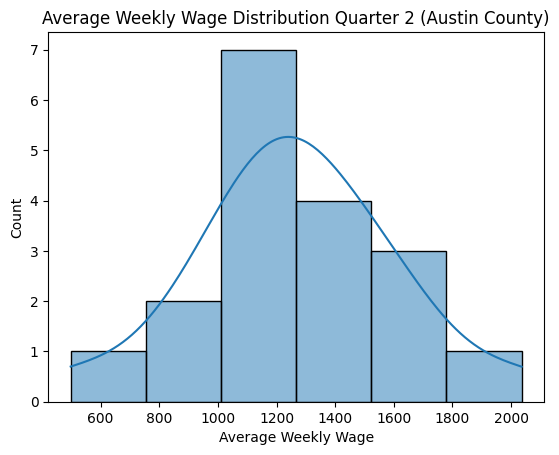

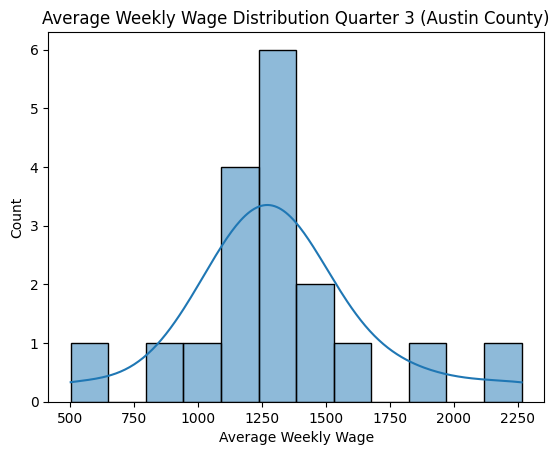

In [ ]:
# Employment Histogram

sns.histplot(q1_filtered["Average Weekly Wage"], kde=True)
plt.title("Average Weekly Wage Distribution Quarter 1 (Austin County)")
plt.show()

sns.histplot(q2_filtered["Average Weekly Wage"], kde=True)
plt.title("Average Weekly Wage Distribution Quarter 2 (Austin County)")
plt.show()

sns.histplot(q3_filtered["Average Weekly Wage"], kde=True)
plt.title("Average Weekly Wage Distribution Quarter 3 (Austin County)")
plt.show()

## 5. Descriptive Analysis

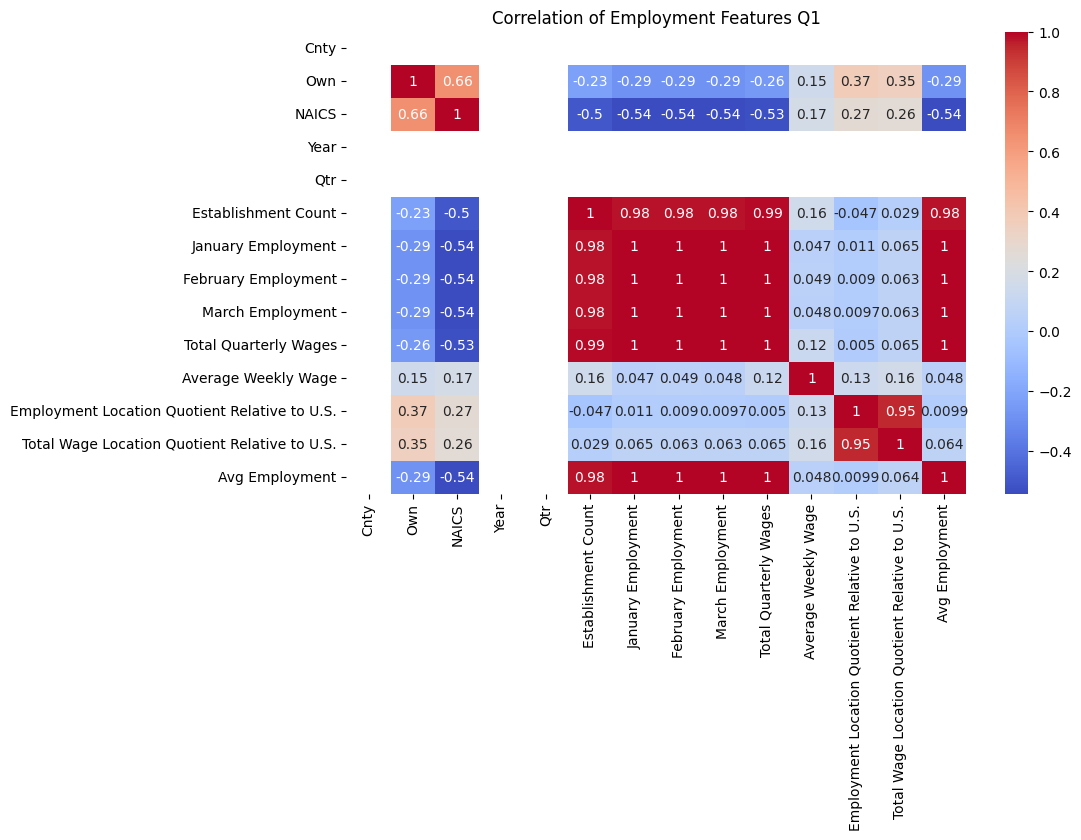

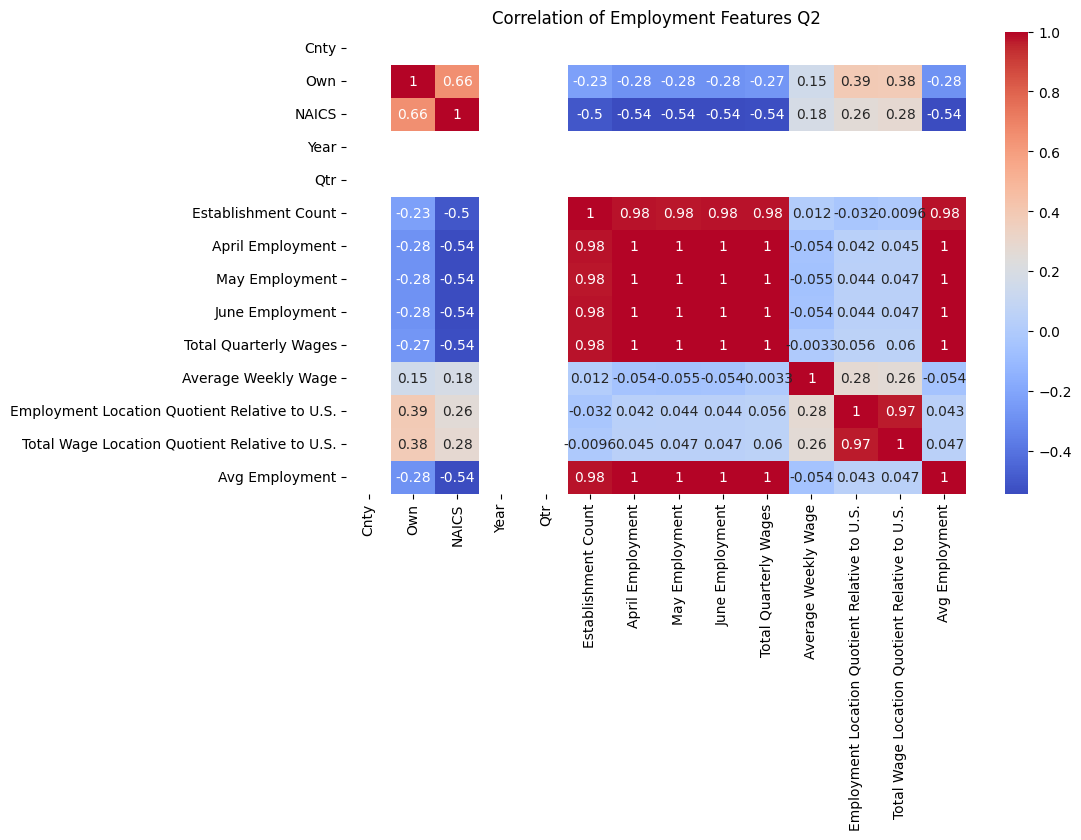

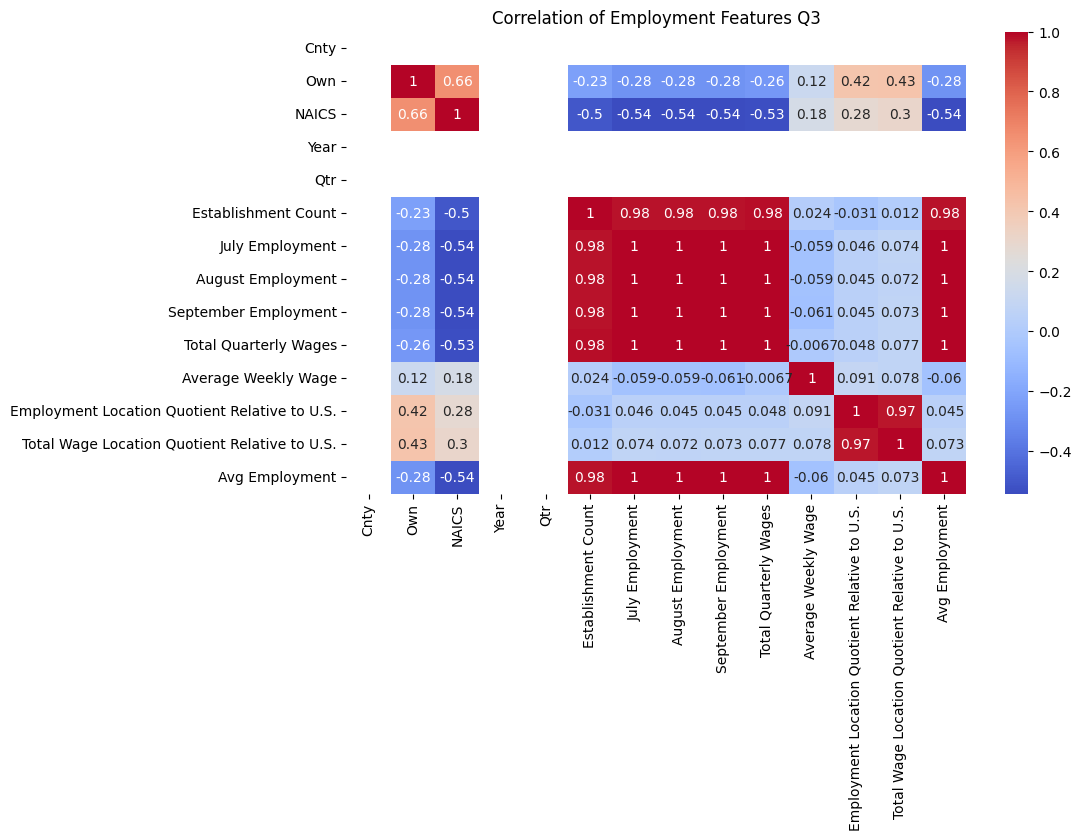

In [ ]:
# Correlation Heatmap

plt.figure(figsize=(10,6))
sns.heatmap(q1_filtered.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation of Employment Features Q1")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(q2_filtered.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation of Employment Features Q2")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(q3_filtered.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation of Employment Features Q3")
plt.show()

## Hypothesis Testing

In [ ]:
# Pearson correlation test
x = combined_df["Avg Employment"]
y = combined_df["Weekly Wage"]

correlation, p_value = pearsonr(x, y)

print("Hypothesis Testing:\n")
print(f"Correlation coefficient: {correlation:.3f}\n")
print(f"P-value: {p_value:.4f}\n")

if p_value < 0.05:
    print("Statistically significant correlation.")
else:
    print("No statistically significant correlation.")

Hypothesis Testing:

Correlation coefficient: -0.019

P-value: 0.8928

No statistically significant correlation.


## Predictive Model & Predictive Analysis


Predictive Model Evaluation:
R² Score: 0.00035
RMSE: 373.74


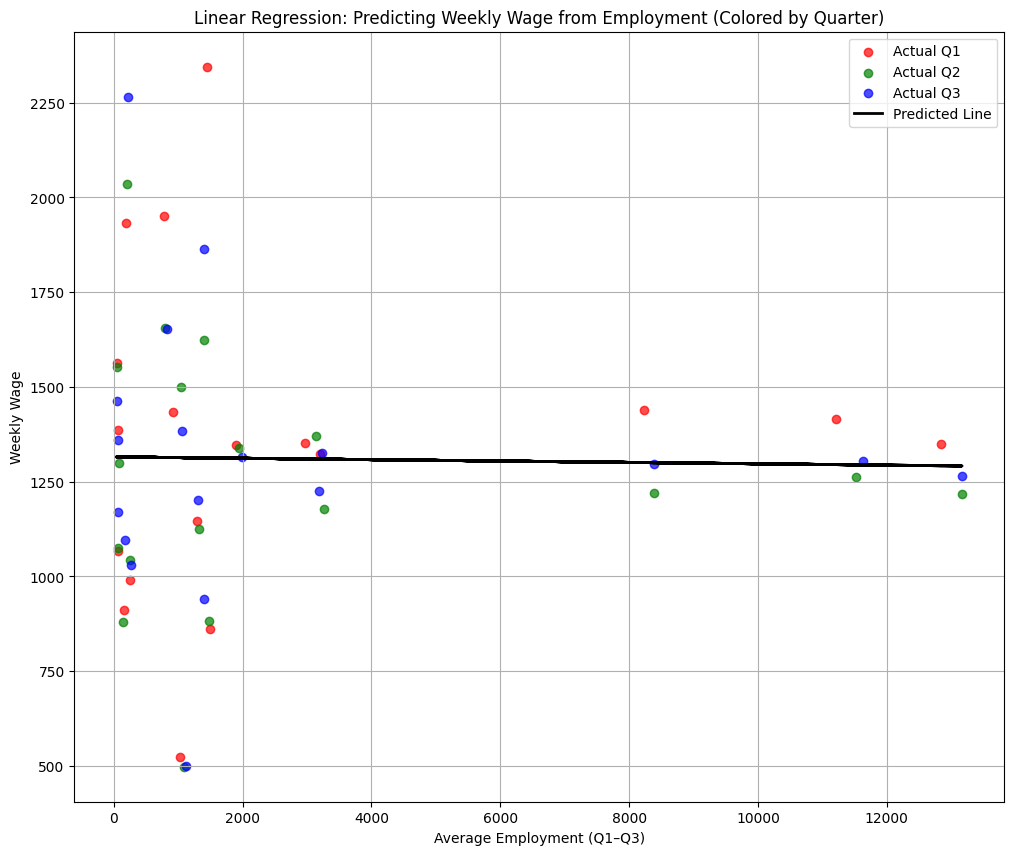

In [ ]:
# Linear Regression model
X = combined_df[["Avg Employment"]]
y = combined_df["Weekly Wage"]

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Evaluation
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print("\nPredictive Model Evaluation:")
print(f"R² Score: {r2:.5f}")
print(f"RMSE: {rmse:.2f}")

# Plot predictions
plt.figure(figsize=(12, 10))

colors = {"Q1": "red", "Q2": "green", "Q3": "blue"}

for quarter, group in combined_df.groupby("Quarter"):
    plt.scatter(group["Avg Employment"], group["Weekly Wage"],
                label=f"Actual {quarter}", color=colors[quarter], alpha=0.7)

# Plot regression line (in black)
plt.plot(X, y_pred, color="black", label="Predicted Line", linewidth=2)

# Labels and title
plt.xlabel("Average Employment (Q1–Q3)")
plt.ylabel("Weekly Wage")
plt.title("Linear Regression: Predicting Weekly Wage from Employment (Colored by Quarter)")
plt.legend()
plt.grid(True)
plt.show()